# Modified CIFAR-4
- Origin paper: https://arxiv.org/pdf/2103.03399.pdf
- Modified CIFAR-4
    - 4 of CIFAR-10 classes: {plane, car, bird, horse}
    - sort into binary categories of {land/air, animal/vehicle}
- Number of samples
    - each class: train 5000, test 1000
    - each group: train 10000, test 2000
- Subpopulation size: 2 settings for V1 and V2

In [3]:
ROOT_PATH = './cifar10' # cifar10 dataset will be downloaded to this root path
EXP_ROOT_PATH = '../../experiments/modified-cifar4' # experiment root path

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import shutil

In [6]:
# download cifar10 data
cifar_data = {}
cifar_data['train'] = torchvision.datasets.CIFAR10(root=ROOT_PATH, train=True, download=True, transform=None)
cifar_data['test'] = torchvision.datasets.CIFAR10(root=ROOT_PATH, train=False, download=True, transform=None)

# prepare modified-cifar4
cifar_cls_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
cifar4_cls_name_dict = {'airplane':'air\n(vehicle)', 'automobile':'land\n(vehicle)', 'bird':'air\n(animal)', 'horse':'land\n(animal)'}
cifar4_cls = [0,1,2,7]
cifar4_data = {'train':{}, 'test':{}}

for id, (dtype, ddict) in enumerate(cifar4_data.items()):
    for i_cls in cifar4_cls:
        ddict[cifar_cls_names[i_cls]] = []
    for i, sample in enumerate(cifar_data[dtype]):
        if sample[1] in cifar4_cls:
            ddict[cifar_cls_names[sample[1]]].append(sample[0])
    for cls_name, img_list in ddict.items():
        random.Random(42).shuffle(img_list)

Files already downloaded and verified
Files already downloaded and verified


## Dataset samples

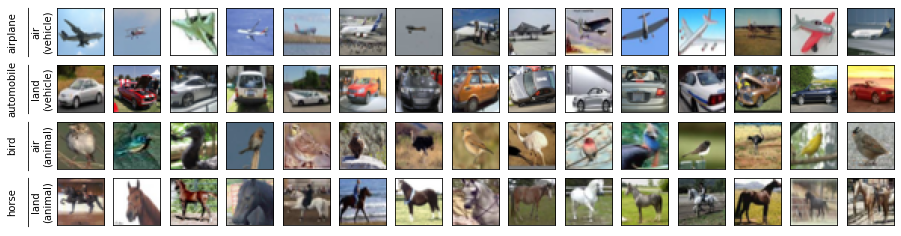

In [12]:
import warnings
warnings.filterwarnings('ignore')
nline = 15
plt.figure(figsize=(nline, 4))
for id, (dtype, ddict) in enumerate(cifar4_data.items()):
    for ic, (cls_name, img_list) in enumerate(ddict.items()):
        for i in range(nline):
            plt.subplot(4, nline, nline*ic+i+1)
            plt.imshow(img_list[i])
            plt.ylabel(cls_name+'\n__________\n'+cifar4_cls_name_dict[cls_name]) if i==0 else None
            plt.xticks([])
            plt.yticks([])

## Prepare data: Modified-CIFAR4 V1
- Target label: [air, land]
- Subpopulation size
    - Majority: air-vehicle(airplane) (4500 images), land-animal(horse) (4500 images)
    - Minority: air-animal(bird) (500 images), land-vehicle(automobile) (500 images)

In [ ]:
EXP_ROOT_PATH = '../../experiments/modified-cifar4-v1' # experiment root path

TRAIN_NUM = [4500,500] # [majority, minority] for each class
VAL_NUM   = [1000,1000] # [majority, minority] for each class
print('majority : minority = {:.2f} : {:.2f}'.format(\
    TRAIN_NUM[0]/(TRAIN_NUM[0]+TRAIN_NUM[1]), TRAIN_NUM[1]/(TRAIN_NUM[0]+TRAIN_NUM[1])))

split_list = {'train':{'air' : cifar4_data['train']['airplane'][:TRAIN_NUM[0]] \
                             + cifar4_data['train']['bird'][:TRAIN_NUM[1]], \
                       'land': cifar4_data['train']['automobile'][:TRAIN_NUM[1]] \
                             + cifar4_data['train']['horse'][:TRAIN_NUM[0]] }, \
              'majority-val':{'air' : cifar4_data['test']['airplane'][:VAL_NUM[0]], \
                               'land': cifar4_data['test']['horse'][:VAL_NUM[0]] }, \
              'minority-val':{'air' : cifar4_data['test']['bird'][:VAL_NUM[1]], \
                                   'land': cifar4_data['test']['automobile'][:VAL_NUM[1]] }}
for cls, img_list in split_list['train'].items():
    random.Random(42).shuffle(img_list)
    
# Data Loading
DATA_ROOT_PATH = os.path.join(EXP_ROOT_PATH, 'data') 
if os.path.exists(DATA_ROOT_PATH) and os.path.isdir(DATA_ROOT_PATH):
    shutil.rmtree(DATA_ROOT_PATH)
os.makedirs(DATA_ROOT_PATH, exist_ok = False)

for k,v in split_list.items():
    for i_cls, (c,pil_imgs) in enumerate(v.items()):
        os.makedirs(os.path.join(DATA_ROOT_PATH, k, str(i_cls)) , exist_ok = True)
        print(DATA_ROOT_PATH, k, i_cls, c)
        for i_img, pil_img in tqdm(enumerate(pil_imgs)):
            dst_path = os.path.join(DATA_ROOT_PATH, k, str(i_cls), str(i_img)+'.jpg')
            pil_img.save(dst_path)

## Prepare data: Modified-CIFAR4 V2
- Target label: [air, land]
- Subpopulation size
    - Majority: air-vehicle(airplane) (4500 images), land-vehicle(automobile) (4500 images)
    - Minority: air-animal(bird) (500 images), land-animal(horse) (500 images)

In [ ]:
EXP_ROOT_PATH = '../../experiments/modified-cifar4-v2' # experiment root path

TRAIN_NUM = [4500,500] # [majority, minority] for each class
VAL_NUM   = [1000,1000] # [majority, minority] for each class
print('majority : minority = {:.2f} : {:.2f}'.format(\
    TRAIN_NUM[0]/(TRAIN_NUM[0]+TRAIN_NUM[1]), TRAIN_NUM[1]/(TRAIN_NUM[0]+TRAIN_NUM[1])))

split_list = {'train':{'air' : cifar4_data['train']['airplane'][:TRAIN_NUM[0]] \
                             + cifar4_data['train']['bird'][:TRAIN_NUM[1]], \
                       'land': cifar4_data['train']['automobile'][:TRAIN_NUM[0]] \
                             + cifar4_data['train']['horse'][:TRAIN_NUM[1]] }, \
              'majority-val':{'air' : cifar4_data['test']['airplane'][:VAL_NUM[0]], \
                               'land': cifar4_data['test']['automobile'][:VAL_NUM[0]] }, \
              'minority-val':{'air' : cifar4_data['test']['bird'][:VAL_NUM[1]], \
                                   'land': cifar4_data['test']['horse'][:VAL_NUM[1]] }}
for cls, img_list in split_list['train'].items():
    random.Random(42).shuffle(img_list)
    
# Data Loading
DATA_ROOT_PATH = os.path.join(EXP_ROOT_PATH, 'data') 
if os.path.exists(DATA_ROOT_PATH) and os.path.isdir(DATA_ROOT_PATH):
    shutil.rmtree(DATA_ROOT_PATH)
os.makedirs(DATA_ROOT_PATH, exist_ok = False)

for k,v in split_list.items():
    for i_cls, (c,pil_imgs) in enumerate(v.items()):
        os.makedirs(os.path.join(DATA_ROOT_PATH, k, str(i_cls)) , exist_ok = True)
        print(DATA_ROOT_PATH, k, i_cls, c)
        for i_img, pil_img in tqdm(enumerate(pil_imgs)):
            dst_path = os.path.join(DATA_ROOT_PATH, k, str(i_cls), str(i_img)+'.jpg')
            pil_img.save(dst_path)